In [ ]:
# Lecture 4 Linear Regression, kNN Regression and Inference

In [1]:
# Part 1: Load Basic Python Modules

In [2]:
# Access to pandas dataframes
import pandas as pd # (see https://pandas.pydata.org/ for documentation)

# Access to matplotlib for plotting capabilities
# The inline command below allows you to display plots 
# in the notebook.  Without this command, the plots wouldn't 
# show up
%pylab inline
import matplotlib.pylab as plt # (see https://matplotlib.org/ for documentation)

# Access to numpy for basic numerical algorithms
import numpy as np # (see http://www.numpy.org/ for documentation)

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Read data
df_adv = pd.read_csv('Advertising.csv')
df_adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Get a subset of the data
data_x = df_adv.TV[5:13]
data_y = df_adv.sales[5:13]

In [6]:
# Sort the data
idx = np.argsort(data_x).values # Get indices ordered from lowest to highest values

# Note:  You may find it helpful to print out idx to see what's in it

In [7]:
# Get the actual data in the order from above
data_x  = data_x.iloc[idx]
data_y  = data_y.iloc[idx]

In [8]:
# Here's a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  Note that this 
# is just for k = 1 and the distance function is simply the 
# absolute value.
def find_nearest(array,value):
    idx = (np.abs(array-value)).idxmin()
    return idx, array[idx]

In [9]:
# Note that we have used the idxmin method in our function.  This is 
# because `array' is a pandas dataframe and idxmin() is designed to 
# work with pandas dataframes.  If we are working with a numpy array 
# then the appropriate method would be `argmin()'.

# Create some artificial x-values (might not be in the actual dataset)
x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero
y = np.zeros( (len(x)))

In [10]:
# Apply the KNN algorithm.  Try to predict the y-value at a given x-value
# Note:  You may have tried to use the `range' method in your code.  Enumerate 
# is far better in this case.  Try to understand why.
for i, xi in enumerate(x):
    y[i] = data_y[find_nearest( data_x, xi )[0]]

Text(0,0.5,'Sales in $1000')

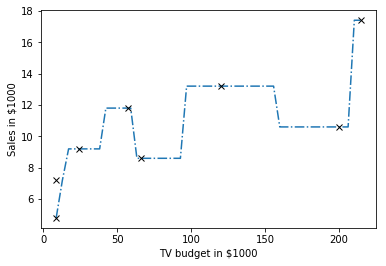

In [11]:
# Plot your solution    
plt.plot(x,y, '-.')
# Plot the original data using black x's.
plt.plot(df_adv.TV[5:13], df_adv.sales[5:13], 'kx')
plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

In [ ]:
# quiz 2

In [12]:
import numpy as np
beta_0 = 7.10
beta_1 = np.linspace(0.0,0.075, 10000)

In [13]:
x = df_adv.TV[5:13].values
y = df_adv.sales[5:13].values
n = len(x)

In [14]:
# get loss func
L = np.zeros(len(beta_1))
for idx, xi in enumerate(x):
    L += (y[idx] - beta_1 * xi - beta_0) ** 2.0
L /= n 
print(L[np.argmin(L)], beta_1[np.argmin(L)])

4.916913448752898 0.03715121512151215


Text(0.5,0,'$\\beta_{1}$')

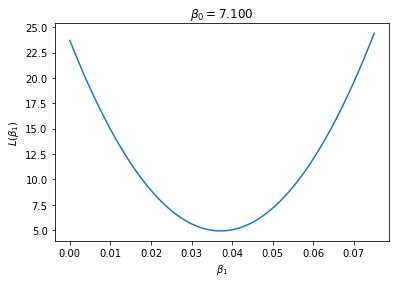

In [15]:
plt.plot(beta_1, L)
plt.title(r'$\beta_0 = {0:5.3f}$'.format(beta_0))
plt.ylabel(r'$L\left(\beta_{1}\right)$')
plt.xlabel(r'$\beta_{1}$')

In [16]:
def beta_hat(x, y):
    # Mean of x and y
    xbar = np.mean(x)
    ybar = np.mean(y) 

    xi_minus_xbar = x - xbar
    yi_minus_ybar = y - ybar
    
    # Numerator of beta_1 expression
    num = xi_minus_xbar * yi_minus_ybar
    num = np.sum(num)
    
    # Denominator of beta_1 expression
    den = np.linalg.norm(xi_minus_xbar)**2.0
    
    # beta_1 and beta_0
    beta_hat_1 = num / den    
    beta_hat_0 = ybar - beta_hat_1 * xbar
    
    return [beta_hat_0, beta_hat_1]

beta = beta_hat(x,y)

print(beta[0], beta[1])

7.104179777376865 0.03712691132540045


In [17]:
#  true minimum of L.
L = 0.0
for idx, xi in enumerate(x):
    L += (y[idx] - beta[1] * xi - beta[0]) ** 2.0
L /= n
print(L)

4.916905702968989


In [18]:
# Lab 3: Scikit-learn for Regression

In [19]:
# import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

In [20]:
# Simple Linear Regression

In [21]:
# your code here
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [22]:
x_train.shape

(3,)

In [23]:
x_train = x_train.reshape(3,1)
x_train.shape

(3, 1)

In [24]:
xx = np.array([[1,3,5],[6,2,1]])
xx.shape

(2, 3)

In [25]:
xx = xx.reshape(3,-1)
xx

array([[1, 3],
       [5, 6],
       [2, 1]])

(3,) (3,)


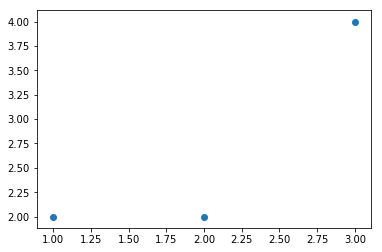

In [26]:
# make a simple scatterplot
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

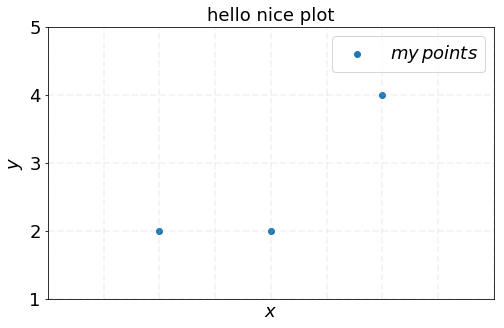

In [27]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$my points$')
    #ax.scatter(x, y, label='$my points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'hello nice plot')

In [28]:
# Building a model from scratch

In [29]:
# your code here
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
xxx.shape

(3, 2)

In [30]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

(3, 1)


In [31]:
x_train

array([[1],
       [2],
       [3]])

In [32]:
y_train

array([[2],
       [2],
       [4]])

In [33]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

() ()


In [36]:
#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))
print("The best fit is {beta_0}")

The best-fit line is 0.67 + 1.00 * x
The best fit is {beta_0}


In [37]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])

In [38]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

Reshaping features array.
Reshaping observations array.
The best-fit line is 0.666667 + 1.000000 * x


Text(0,0.5,'$y$')

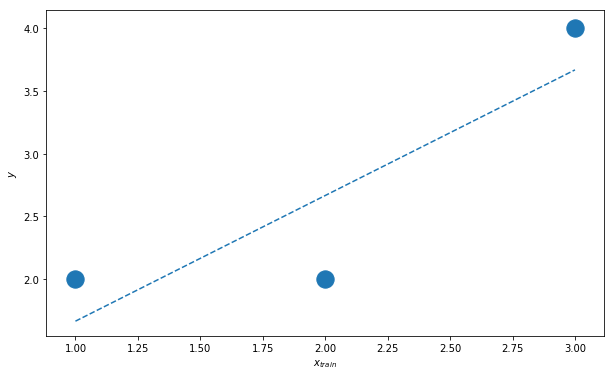

In [39]:
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3]]).T

best_fit = beta_0 + beta_1 * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$')

In [40]:
# Building a model with statsmodels and sklearn

In [41]:
import statsmodels.api as sm

In [42]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print("The regression coeffs from the statsmodels are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_sm, beta1_sm))

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coeffs from the statsmodels are: beta_0 = 0.666667 and beta_1 = 1.000000


In [43]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Thu, 19 Sep 2019   Prob (F-statistic):              0.333
Time:                        14:02:25   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

In [ ]:
# sklearn library

In [44]:
from sklearn import linear_model

In [45]:
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coeffs from the sklearn are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

The regression coeffs from the sklearn are: beta_0 = 0.666667 and beta_1 = 1.000000


In [54]:
# work on the mtcars dataset

In [55]:
import pandas as pd

#load mtcars
dfcars = pd.read_csv("mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [56]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [57]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


In [58]:
# Extract the response variable that we're interested in
y_train = traindf.mpg

In [59]:
np.shape(y_train)

(25,)

In [60]:
y_train.shape

(25,)

In [61]:
y_train_reshape = y_train.values.reshape(y_train.shape[0], 1)

In [62]:
y_train_reshape.shape

(25, 1)

In [63]:
y_train_reshape = traindf[['mpg']]

In [64]:
y_train_reshape.shape

(25, 1)

In [65]:
y_train_reshape = y_train.values.reshape(-1,1)
y_train_reshape.shape

(25, 1)

In [66]:
# Simple linear regression with automobile data

Text(0,0.5,'Car MPG')

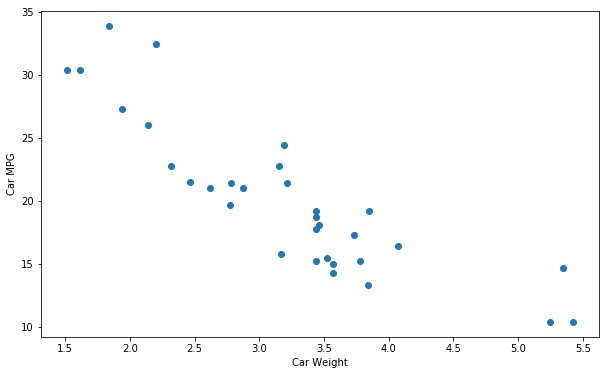

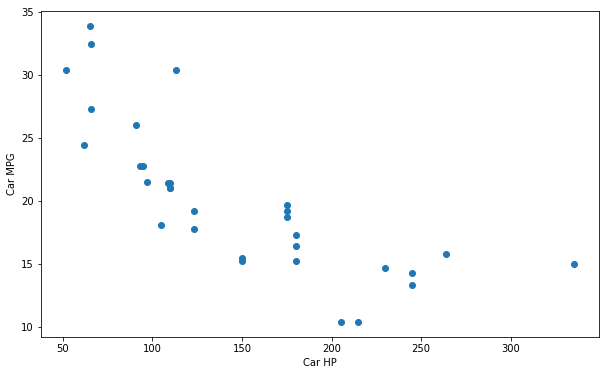

In [67]:
y_mpg = dfcars.mpg
x_wt = dfcars.wt
x_hp = dfcars.hp

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_wt, y_mpg)
ax_wt.set_xlabel(r'Car Weight')
ax_wt.set_ylabel(r'Car MPG')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_hp, y_mpg)
ax_hp.set_xlabel(r'Car HP')
ax_hp.set_ylabel(r'Car MPG')

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [70]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)

r2 = regression.score(X_test, y_test)
print(r2)

0.6879761857596272


In [71]:
print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

0.7701379909791617
12.475985659918837
7.773697766387512
Coefficients: 
 -5.336941400557081 36.93731031351841


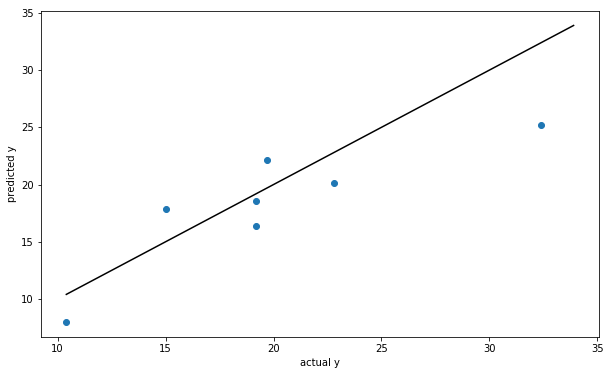

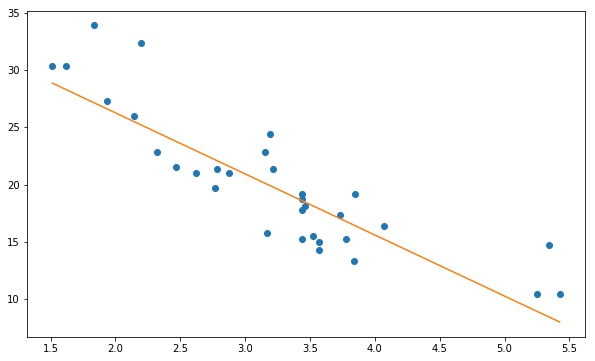

In [72]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))

In [46]:
# k -nearest neighbors

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)

In [73]:
knnreg.fit(X_train, y_train)
r2 = knnreg.score(X_test, y_test)
r2

0.6992188728167332

In [74]:
# solution
knnreg.score(X_train, y_train)

0.8718092469742431

In [75]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    regdict[k] = knnreg # Store the regressors in a dictionary

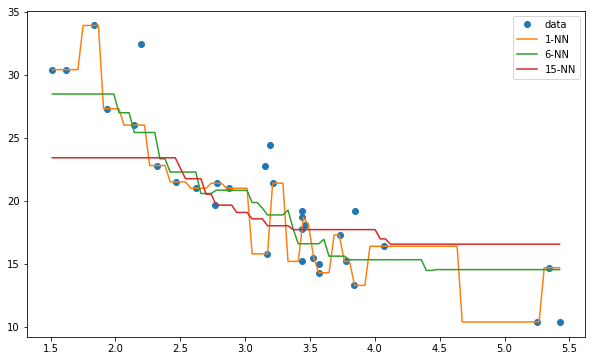

In [76]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend()

Text(0,0.5,'$R^{2}$')

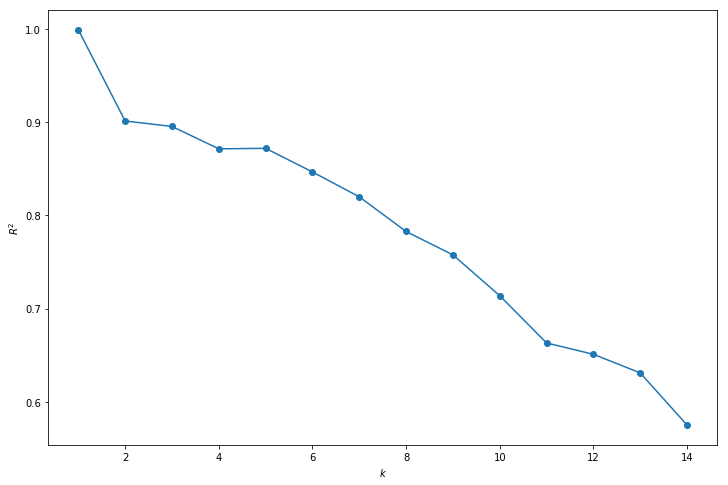

In [77]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_train = knnreg.score(X_train, y_train) # Calculate R^2 score
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

Text(0,0.5,'$R^{2}$')

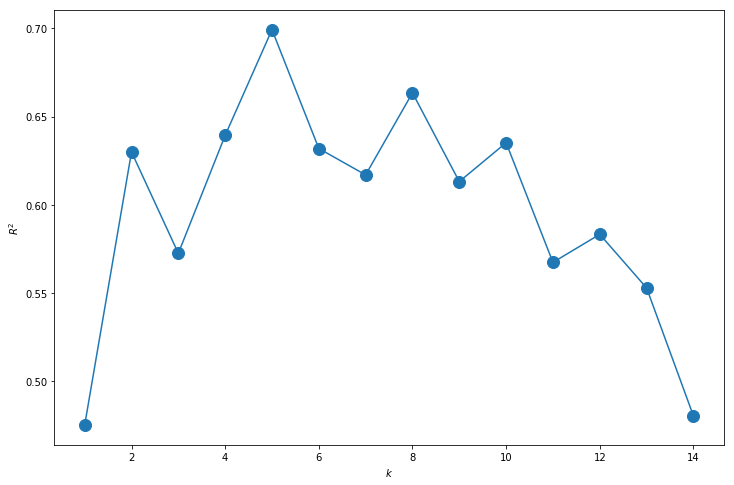

In [78]:
ks = range(1, 15) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_test = knnreg.score(X_test, y_test) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_test,'o-', ms=12)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

In [ ]:
# https://harvard-iacs.github.io/2018-CS109A/labs/lab-3/solutions/